In [ ]:
#importing the packages
 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas.util.testing as tm
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 
#importing the data
path = 'https://raw.githubusercontent.com/thomasgnyra/climbingdata/master/elevationdata.csv'
df = pd.read_csv(path)
 
 
pd.set_option('mode.chained_assignment', None) #remove warnings about writing to a copy

In [ ]:
df['Chainage delta'] = df['Chainage'] - df['Chainage'].shift(1) 
df['Elevation delta'] = df['Elevation'] - df['Elevation'].shift(1)


In [ ]:
df['distance between points'] = (df['Chainage delta']**2 + df['Elevation delta']**2)**(0.5) #distance


In [ ]:
#val1 = input("Please enter a value between 1 and %s \n" % (len(dfsave.index)-1))
#val1 = int(val1)


In [ ]:
dfsave = df
print(len(dfsave.index))

df1 = df[:320] #valve 1
df2 = df[320:510].reset_index() #valve 2
df3 = df[510:660].reset_index() #valve 3
df4 = df[660:].reset_index()

1002


In [ ]:
%%time

for df in (df1,df2,df3,df4):

  df['E1'] = df['Elevation']
  df['dist1'] = df['distance between points'] 

  numberrows = len(df.index)
  ii = 0

  while ii < numberrows : #forward loop
    df['E2']=df.E1.where(df.E1.eq(df.E1.cummax()),0) #cummulative max with zero replacement if not the max
    df['dist2'] = np.where(df['E2'] == 0, 0, df['dist1'])
    df.loc[ii,'solution'] = df['dist2'].sum()
    df.loc[ii,'E1'] = 0
    df['E2'] = df['E1']
    df['dist2'] = df['dist1']

    ii = ii+1

  df['E1'] = df['Elevation'].values[::-1] 

  ii = 0

  while ii < numberrows : #backward loop
    df['E2']=df.E1.where(df.E1.eq(df.E1.cummax()),0) #cummulative max with zero replacement if not the max
    df['dist2'] = np.where(df['E2'] == 0, 0, df['dist1'])
    df.loc[ii,'solution2'] = df['dist2'].sum()
    df.loc[ii,'E1'] = 0
    df['E2'] = df['E1']
    df['dist2'] = df['dist1']

    ii = ii+1

  df['total'] = df['solution'] + df['solution2'].values[::-1]


CPU times: user 3.99 s, sys: 9.91 ms, total: 4 s
Wall time: 3.99 s


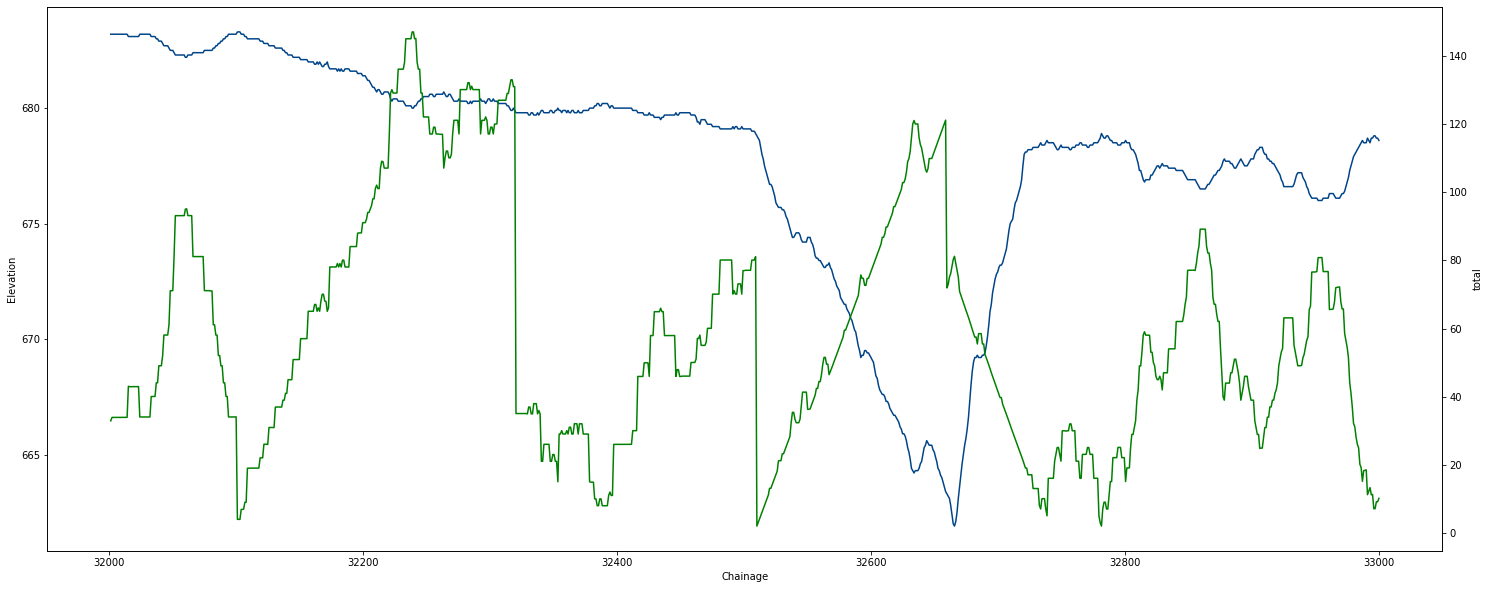

In [ ]:
df = pd.concat([df1,df2,df3,df4]) #build sheet again


fig, ax1 = plt.subplots(figsize=(25,10))
ax2 = ax1.twinx()

sns.lineplot(x="Chainage", y="Elevation", data=df, ax=ax1, color='#004488')
sns.lineplot(x="Chainage", y="total", data=df, ax=ax2, color='g')